In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [230]:
points_df = pd.read_csv('./datapoints.csv')
points_df

,x,y
0,0.000000,0.496714
1,0.052632,0.019630
2,0.105263,0.963478
3,0.157895,1.996714
4,0.210526,0.397426
5,0.263158,0.555337
6,0.315789,2.526581
7,0.368421,1.872698
8,0.421053,0.793684
9,0.473684,1.963613


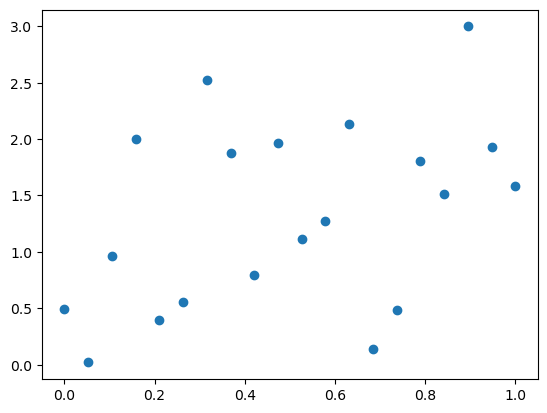

In [231]:
plt.scatter(points_df.x,points_df.y)

In [257]:
def mse(predicted, true):
    n = len(true)
    return (1/n)*((predicted - true)**2).sum()

In [233]:
a = 10
b = -2
a, b

(10, -2)

In [234]:
y_pred = a * points_df.x + b
y_pred.name = 'y'

In [242]:
error = mse(y_pred,points_df.y)
error

10.621305173303698

In [236]:
pred_df = points_df.copy()
pred_df.drop(['y'], axis=1, inplace=True)
pred_df = pd.concat([pred_df,y_pred],axis=1)
pred_df

,x,y
0,0.000000,-2.000000
1,0.052632,-1.473684
2,0.105263,-0.947368
3,0.157895,-0.421053
4,0.210526,0.105263
5,0.263158,0.631579
6,0.315789,1.157895
7,0.368421,1.684211
8,0.421053,2.210526
9,0.473684,2.736842


In [239]:
epoch = 0

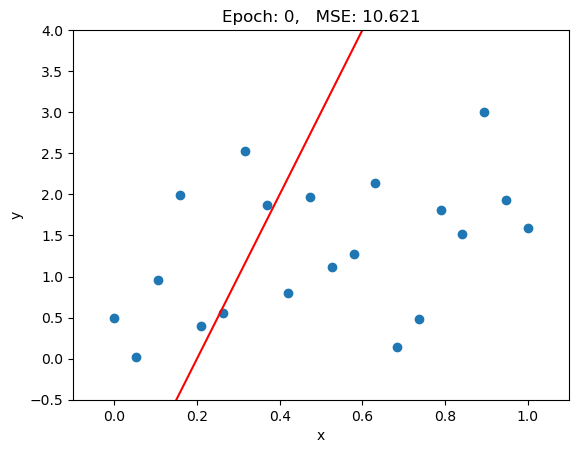

In [249]:
xmin = -0.1
xmax = 1.1
ymin = -0.5
ymax = 4

plt.axis((xmin, xmax, ymin, ymax))
plt.title(label=f'Epoch: {epoch},   MSE: {round(error,3)}')
sns.lineplot(x=pred_df.x, y=pred_df.y, color='red')
plt.scatter(points_df.x,points_df.y)

In [250]:
mse(pred_df.y, points_df.y)

10.621305173303698

In [258]:
def dmse_da(x, predicted, true):
    n = len(true)
    return (2/n)*((predicted - true) * x).sum()

def dmse_db(predicted, true):
    n = len(true)
    return (2/n)*(predicted - true).sum()

ALGORITHM:  

For each `epoch`  
+ Calculate the predictions,  
+ Calculate error wrt `a` and `b`,  
+ Update `a` and `b`,  
+ Print `error`  

In [286]:
def fit(epochs, x, y, ytrue, lr):
    history = []
    params = []
    a = 10
    b = -2
    for epoch in range(epochs):
        y = a * x + b
        error = mse(y, ytrue)
        a -= dmse_da(x, y, ytrue) * lr
        b -= dmse_db(y, ytrue) * lr
        history.append((epoch, error))
        params.append((a,b))
    return params, history

In [287]:
dmse_da(points_df.x, pred_df.y, points_df.y)

3.3092488964548057

In [288]:
dmse_db(pred_df.y, points_df.y)

3.3425971228836575

In [289]:
params, history = fit(200,points_df.x,pred_df.y,points_df.y,0.1)

In [290]:
history

[(0, 10.621305173303698),
 (1, 8.668705594653153),
 (2, 7.509358616248804),
 (3, 6.7936612898503075),
 (4, 6.326947548417019),
 (5, 6.000798435563817),
 (6, 5.754805999625601),
 (7, 5.555289175129504),
 (8, 5.38344596360616),
 (9, 5.228758317395911),
 (10, 5.085320933884896),
 (11, 4.949797641302549),
 (12, 4.820283782122111),
 (13, 4.695672919851648),
 (14, 4.575304277842934),
 (15, 4.458766448287736),
 (16, 4.345788089880613),
 (17, 4.2361770486634125),
 (18, 4.129786434602219),
 (19, 4.026495704043869),
 (20, 3.926200096155438),
 (21, 3.8288047205503455),
 (22, 3.7342212349175585),
 (23, 3.642365965272586),
 (24, 3.5531588301162054),
 (25, 3.4665227129365777),
 (26, 3.3823830851058747),
 (27, 3.300667768959776),
 (28, 3.2213067796875436),
 (29, 3.144232211847535),
 (30, 3.0693781514572382),
 (31, 2.9966806030320274),
 (32, 2.9260774256372883),
 (33, 2.8575082746300593),
 (34, 2.7909145472205825),
 (35, 2.7262393307942956),
 (36, 2.6634273533861776),
 (37, 2.6024249359512783),
 (38, 

In [291]:
params

[(9.66907511035452, -2.334259712288366),
 (9.394218421229409, -2.5685749931545105),
 (9.161599244183684, -2.728541548934915),
 (8.960892771671759, -2.8332528758546665),
 (8.784389979971046, -2.896951290139275),
 (8.626333536499368, -2.93025974239689),
 (8.482422326490989, -2.9411008598558146),
 (8.349441784702758, -2.935382632822116),
 (8.224988088859828, -2.9175099970163347),
 (8.107262382309782, -2.8907665187874163),
 (7.994917244700796, -2.857599165549277),
 (7.886942144341241, -2.819830769197867),
 (7.782577974371146, -2.778818542080783),
 (7.681253288055718, -2.735572343390107),
 (7.582536723566489, -2.690842915806023),
 (7.486101507573377, -2.645187717289833),
 (7.391698970717648, -2.5990200368775698),
 (7.299138786763454, -2.5526456388621863),
 (7.20827422822564, -2.5062901020544603),
 (7.118991164749114, -2.460119216754498),
 (7.031199853927828, -2.414254202166876),
 (6.944828815546078, -2.3687830594146493),
 (6.859820260252068, -2.323769041374693),
 (6.776126677989968, -2.2792

In [313]:
def graph_plot(epoch):
    a,b = params[epoch]
    epoch, error = history[epoch]
    y_pred = a * pred_df.x + b
    plt.axis((xmin, xmax, ymin, ymax))
    plt.title(label=f'Epoch: {epoch+1:3},   MSE: {round(error,3):.3f}')
    sns.lineplot(x=pred_df.x, y=y_pred, color='red')
    plt.scatter(points_df.x,points_df.y)

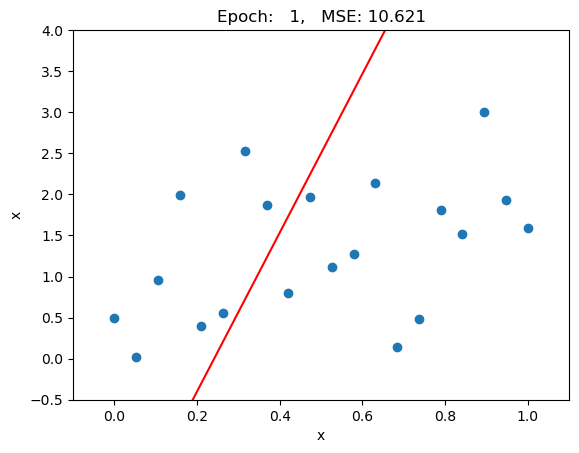

In [314]:
graph_plot(0)

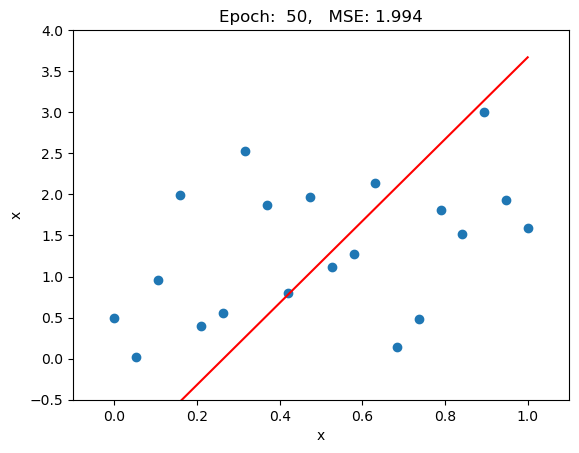

In [315]:
graph_plot(49)

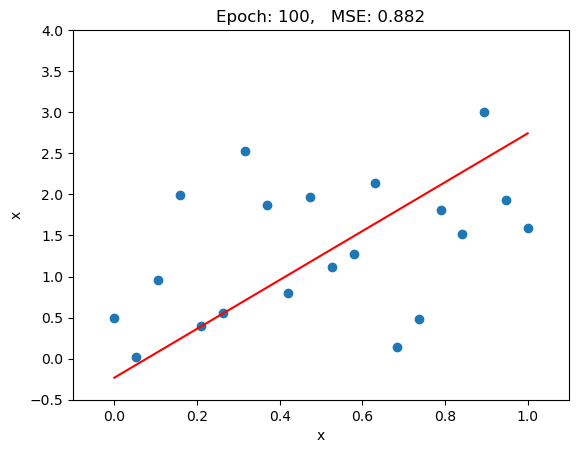

In [316]:
graph_plot(99)

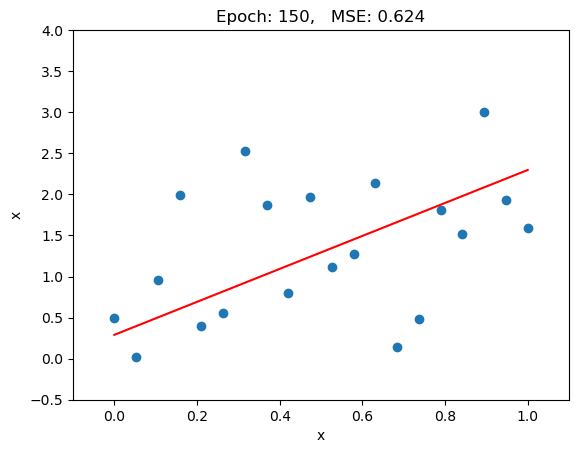

In [317]:
graph_plot(149)

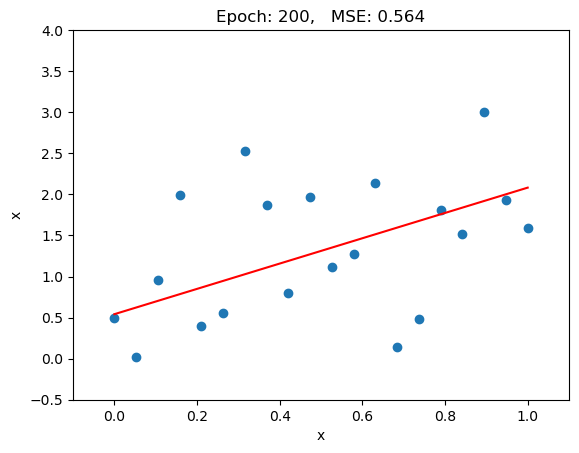

In [318]:
graph_plot(199)

In [320]:
def graph_save(epoch,path):
    a,b = params[epoch]
    epoch, error = history[epoch]
    y_pred = a * pred_df.x + b
    plt.axis((xmin, xmax, ymin, ymax))
    plt.title(label=f'Epoch: {epoch+1:3},   MSE: {round(error,3):.3f}')
    sns.lineplot(x=pred_df.x, y=y_pred, color='red')
    plt.scatter(points_df.x,points_df.y)
    fig = plt.savefig(path + str(epoch))
    plt.close(fig)

In [321]:
for epoch in range(200):
    graph_save(epoch, './img/')

In [322]:
import imageio

In [323]:
images = []

for i in range(200):
    filename = './img/{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=15)

C:\Users\Chris\AppData\Local\Temp\ipykernel_2244\4186363033.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
